# S1 study

- Count and classify S1s

## Imports

In [26]:
import os
import glob
import datetime
print(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

import time
import glob
import tables as tb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce

2018-03-06 15:47:12


In [27]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from invisible_cities.database import load_db

import invisible_cities.sierpe.blr as blr

import invisible_cities.reco.tbl_functions as tbl
import invisible_cities.reco.peak_functions as pkf
import invisible_cities.reco.calib_sensors_functions as csf
from   invisible_cities.reco.xy_algorithms      import corona

from   invisible_cities.evm.ic_containers  import S12Params 
from   invisible_cities.evm.ic_containers  import CalibVectors
from   invisible_cities.evm.ic_containers  import DeconvParams
from   invisible_cities.evm.ic_containers  import ThresholdParams

from   invisible_cities.core.system_of_units_c import units
from   invisible_cities.core.core_functions import loc_elem_1d
from   invisible_cities.core.core_functions import weighted_mean_and_var
from   invisible_cities.core.core_functions import timefunc
from   invisible_cities.core.exceptions     import SipmZeroCharge
from   invisible_cities.types.ic_types import minmax
from   invisible_cities.types.ic_types import NN
import invisible_cities.icaro.mpl_functions as mpl
import invisible_cities.icaro.signal_functions_mpl as sf
from invisible_cities.icaro.pmaps_mpl import plot_s12
from invisible_cities.sierpe                 import blr

In [12]:
from invisible_cities.reco.dst_functions  import load_dst
from invisible_cities.io.dst_io  import load_dsts

In [5]:
from invisible_cities.evm .pmaps             import S1
from invisible_cities.evm .pmaps             import S2

In [6]:
from typing      import NamedTuple

In [35]:
import krs12_functions as krf

## NB functions

### Utilities

In [14]:
def sort_s12s(s12s):
    return sorted(s12s, key= lambda s12 : s12.total_energy, reverse=True)

In [193]:
def file_list(run_number, file_numbers, path='/Users/jjgomezcadenas/Projects/ICDEV/data'):
    return ['{}/run_{}_{}_waveforms.h5'.format(path, run_number, file_number) for file_number in file_numbers]

In [190]:
def create_empty_lists(number_of_lists = 2):
    return ([] for i in range(number_of_lists))
    

### Analysis

### Histograms

In [177]:
class RunInfo(NamedTuple):
    label : str
    dst    : pd.DataFrame 
    ns     : pd.DataFrame

## Autotrigger runs, "empty krypton" (almost no rate)

### Run 5266 - 5274-: Gate voltage: 7800 - 7000 V, Cathode voltage: 30000 V

In [36]:
ns5274, dst5274 = krf.read_dsts('/Users/jjgomezcadenas/Projects/icdev/dsts/5274')
ns5273, dst5273 = krf.read_dsts('/Users/jjgomezcadenas/Projects/icdev/dsts/5273')
ns5272, dst5272 = krf.read_dsts('/Users/jjgomezcadenas/Projects/icdev/dsts/5272')
ns5271, dst5271 = krf.read_dsts('/Users/jjgomezcadenas/Projects/icdev/dsts/5271')
ns5270, dst5270 = krf.read_dsts('/Users/jjgomezcadenas/Projects/icdev/dsts/5270')
ns5269, dst5269 = krf.read_dsts('/Users/jjgomezcadenas/Projects/icdev/dsts/5269')
ns5268, dst5268 = krf.read_dsts('/Users/jjgomezcadenas/Projects/icdev/dsts/5268')
ns5267, dst5267 = krf.read_dsts('/Users/jjgomezcadenas/Projects/icdev/dsts/5267')
ns5266, dst5266 = krf.read_dsts('/Users/jjgomezcadenas/Projects/icdev/dsts/5266')

### Comparison

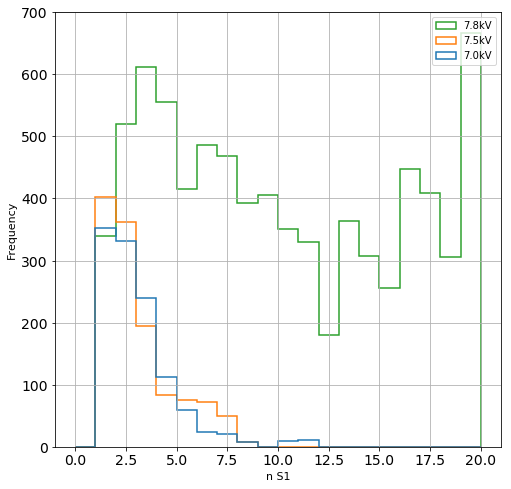

In [400]:
rnd ={5274 : RunInfo('7.0kV' , dst5274, ns5274),  
      5269 : RunInfo('7.5kV' , dst5269, ns5269),
      5266 : RunInfo('7.8kV' , dst5266, ns5266)
     }
krf.ns1s(rnd, figsize=(8,8))

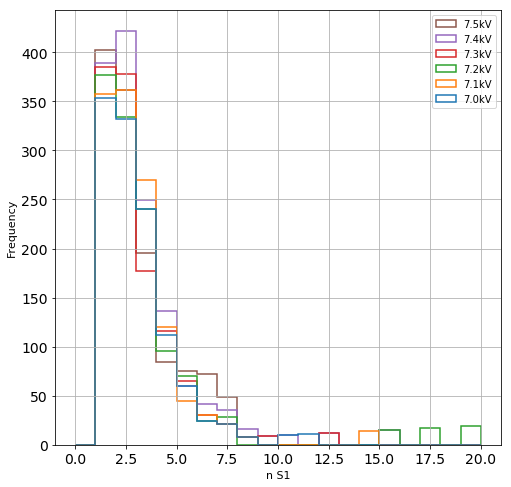

In [401]:
rnd ={5274 : RunInfo('7.0kV' , dst5274, ns5274),  
      5273 : RunInfo('7.1kV' , dst5273, ns5273),
      5272 : RunInfo('7.2kV' , dst5272, ns5273),
      5271 : RunInfo('7.3kV' , dst5271, ns5271),
      5270 : RunInfo('7.4kV' , dst5270, ns5270),
      5269 : RunInfo('7.5kV' , dst5269, ns5269),
     }
krf.ns1s(rnd, figsize=(8,8))

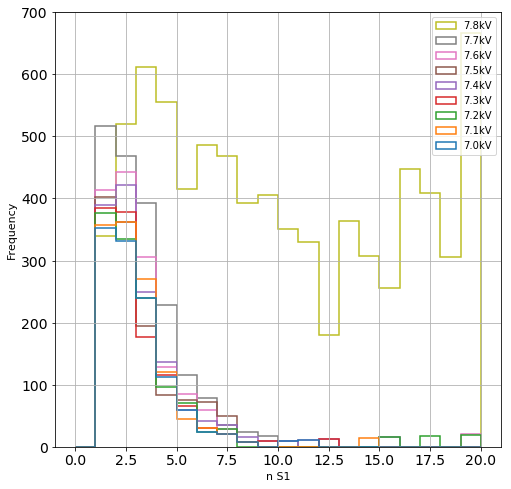

In [402]:
rnd ={5274 : RunInfo('7.0kV' , dst5274, ns5274),  
      5273 : RunInfo('7.1kV' , dst5273, ns5273),
      5272 : RunInfo('7.2kV' , dst5272, ns5273),
      5271 : RunInfo('7.3kV' , dst5271, ns5271),
      5270 : RunInfo('7.4kV' , dst5270, ns5270),
      5269 : RunInfo('7.5kV' , dst5269, ns5269),
      5268 : RunInfo('7.6kV' , dst5268, ns5268),
      5267 : RunInfo('7.7kV' , dst5267, ns5267),
      5266 : RunInfo('7.8kV' , dst5266, ns5266)
     }
krf.ns1s(rnd, figsize=(8,8))

In [ ]:
plot_s1histos(df5254, figsize=(10,10))

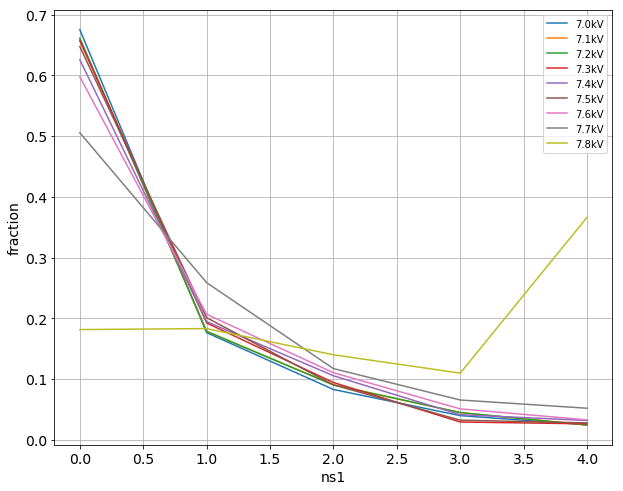

In [379]:
krf.plot_srs(rnd, 5266,5275, reverse=True)

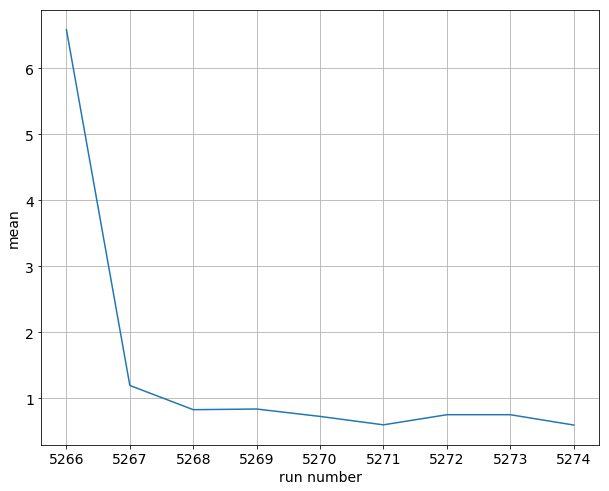

In [381]:
krf.plot_mus(rnd, 5266,5275, reverse=True)

## Krypton runs

### Runs 5283 - 5287: Internal trigger, 5000 events, Kr rate ~ 15.5-16 Hz, Cathode voltage fixed in 30000 V, Gate voltage varying from 7000 to 7800 V in 200 V steps.

In [255]:
ns5283, dst5283 = krf.read_dsts('/Users/jjgomezcadenas/Projects/icdev/dsts/5283')
#krf.ns1(ns5283)

In [256]:
ns5284, dst5284 = krf.read_dsts('/Users/jjgomezcadenas/Projects/icdev/dsts/5284')
#krf.ns1(ns5284)

In [257]:
ns5285, dst5285 = krf.read_dsts('/Users/jjgomezcadenas/Projects/icdev/dsts/5285')
#krf.ns1(ns5285)

In [258]:
ns5286, dst5286 = krf.read_dsts('/Users/jjgomezcadenas/Projects/icdev/dsts/5286')
#krf.ns1(ns5286)

In [259]:
ns5287, dst5287 = krf.read_dsts('/Users/jjgomezcadenas/Projects/icdev/dsts/5287')
#krf.ns1(ns5287)

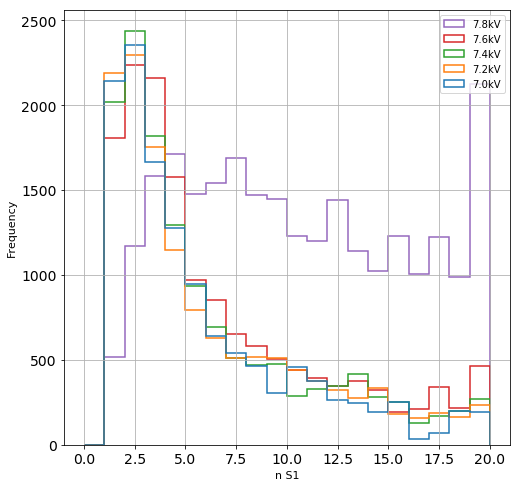

In [403]:
rnd ={5283 : RunInfo('7.0kV' , dst5283, ns5283),  
      5284 : RunInfo('7.2kV' , dst5284, ns5284),
      5285 : RunInfo('7.4kV' , dst5285, ns5285),
      5286 : RunInfo('7.6kV' , dst5286, ns5286),
      5287 : RunInfo('7.8kV' , dst5287, ns5287)
     }
krf.ns1s(rnd, figsize=(8,8))

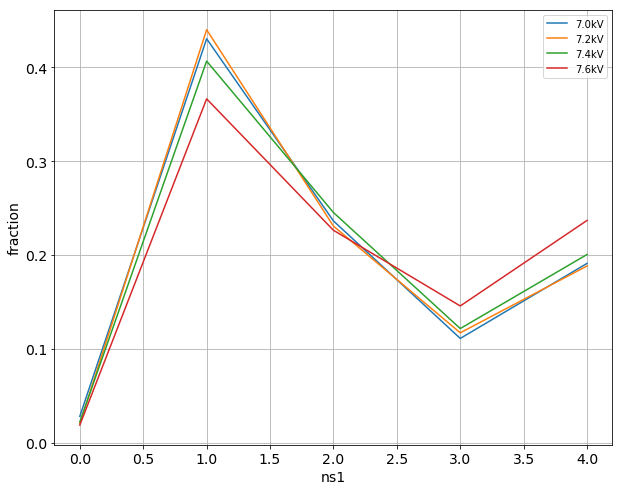

In [384]:
krf.plot_srs(rnd, 5283,5287, reverse=False)

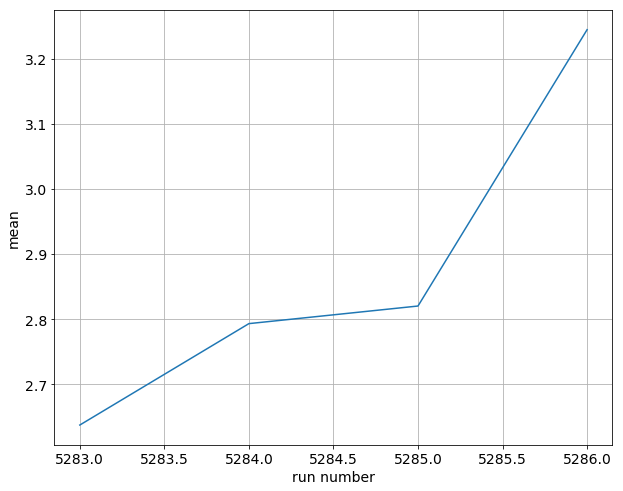

In [387]:
krf.plot_mus(rnd, 5283,5287)

### Runs 5291 - 5295: Internal trigger, 5000 events, Kr rate ~ 12 Hz, Cathode voltage fixed in 30000 V, Gate voltage varying from 7800 to 7000 V in 200 V steps.

In [356]:
ns5291, dst5291 = krf.read_dsts('/Users/jjgomezcadenas/Projects/icdev/dsts/5291')

In [357]:
ns5292, dst5292 = krf.read_dsts('/Users/jjgomezcadenas/Projects/icdev/dsts/5292')

In [358]:
ns5293, dst5293 = krf.read_dsts('/Users/jjgomezcadenas/Projects/icdev/dsts/5293')

In [359]:
ns5294, dst5294 = krf.read_dsts('/Users/jjgomezcadenas/Projects/icdev/dsts/5294')

In [360]:
ns5295, dst5295 = krf.read_dsts('/Users/jjgomezcadenas/Projects/icdev/dsts/5295')

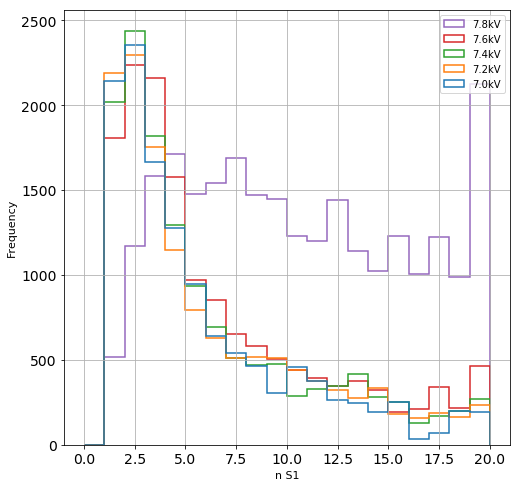

In [404]:
rnd ={5295 : RunInfo('7.0kV' , dst5283, ns5283),  
      5294 : RunInfo('7.2kV' , dst5284, ns5284),
      5293 : RunInfo('7.4kV' , dst5285, ns5285),
      5292 : RunInfo('7.6kV' , dst5286, ns5286),
      5291 : RunInfo('7.8kV' , dst5287, ns5287)
     }
krf.ns1s(rnd, figsize=(8,8))

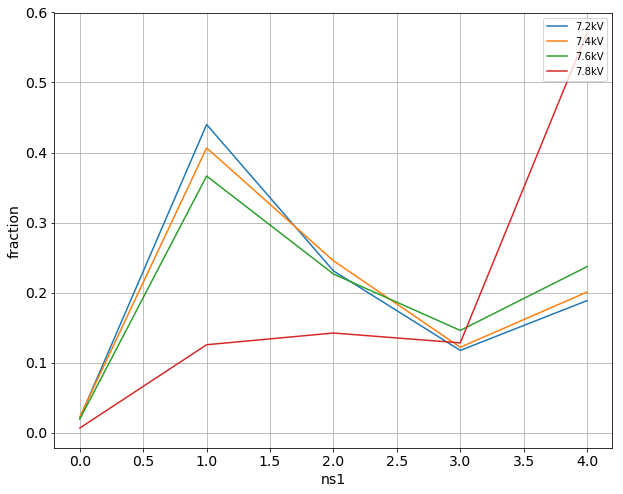

In [389]:
krf.plot_srs(rnd, 5291,5295, reverse=True)

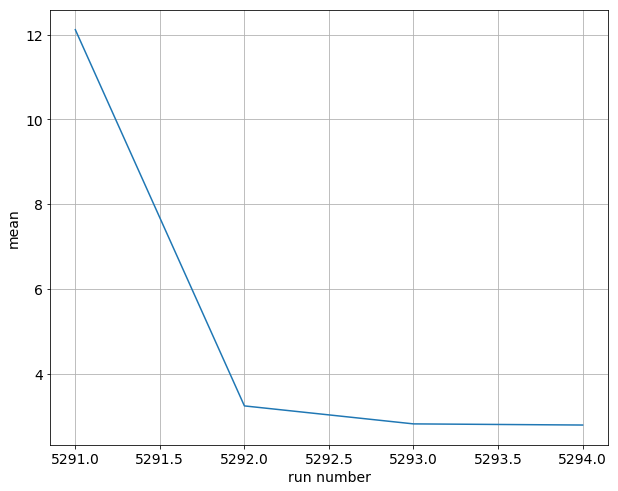

In [391]:
krf.plot_mus(rnd, 5291,5295, reverse=True)

### run 5296 -- 5300, 7.0 -- 7.8 kV, rate 6.8 -- 8.0

In [364]:
ns5296, dst5296 = krf.read_dsts('/Users/jjgomezcadenas/Projects/icdev/dsts/5296')

In [365]:
ns5297, dst5297 = krf.read_dsts('/Users/jjgomezcadenas/Projects/icdev/dsts/5297')

In [366]:
ns5298, dst5298 = krf.read_dsts('/Users/jjgomezcadenas/Projects/icdev/dsts/5298')

In [367]:
ns5299, dst5299 = krf.read_dsts('/Users/jjgomezcadenas/Projects/icdev/dsts/5299')

In [368]:
ns5300, dst5300 = krf.read_dsts('/Users/jjgomezcadenas/Projects/icdev/dsts/5300')

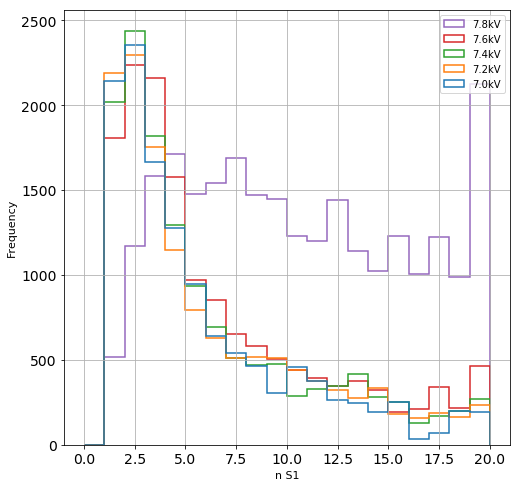

In [405]:
rnd ={5296 : RunInfo('7.0kV' , dst5283, ns5283),  
      5297 : RunInfo('7.2kV' , dst5284, ns5284),
      5298 : RunInfo('7.4kV' , dst5285, ns5285),
      5299 : RunInfo('7.6kV' , dst5286, ns5286),
      5300 : RunInfo('7.8kV' , dst5287, ns5287)
     }
krf.ns1s(rnd, figsize=(8,8))

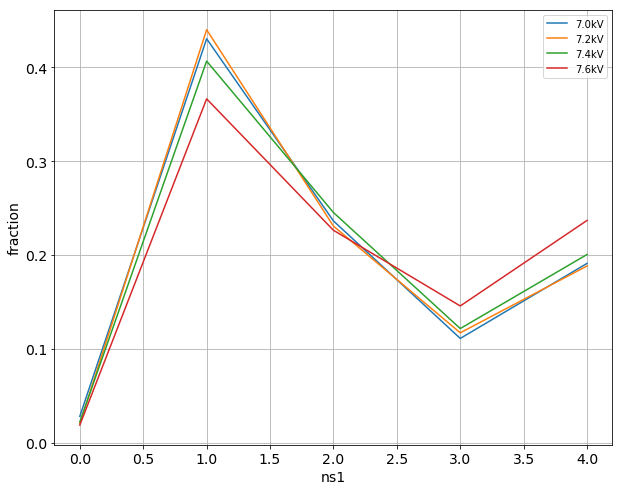

In [393]:
krf.plot_srs(rnd, 5296,5300, reverse=False)

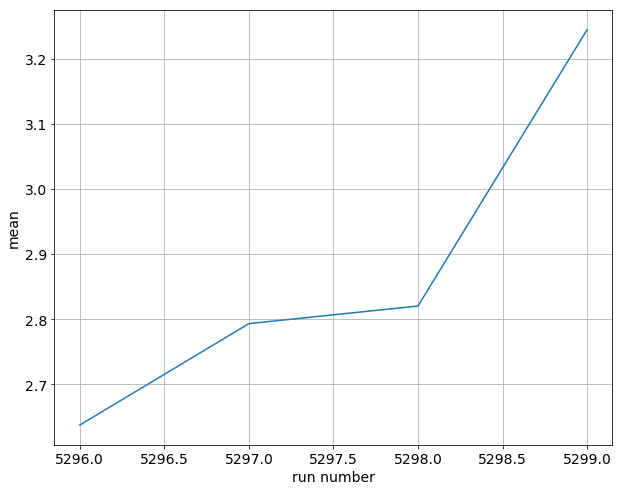

In [394]:
krf.plot_mus(rnd, 5296,5300, reverse=False)

#### The study shows that the chamber becomes unstable above 7.5 kV. Instead the dependence of the number of s1s with krypton intensity (grass) appears to be weal.

## Characterization of events. G = 7.5 kV, high intensity

### Inclusive distribution

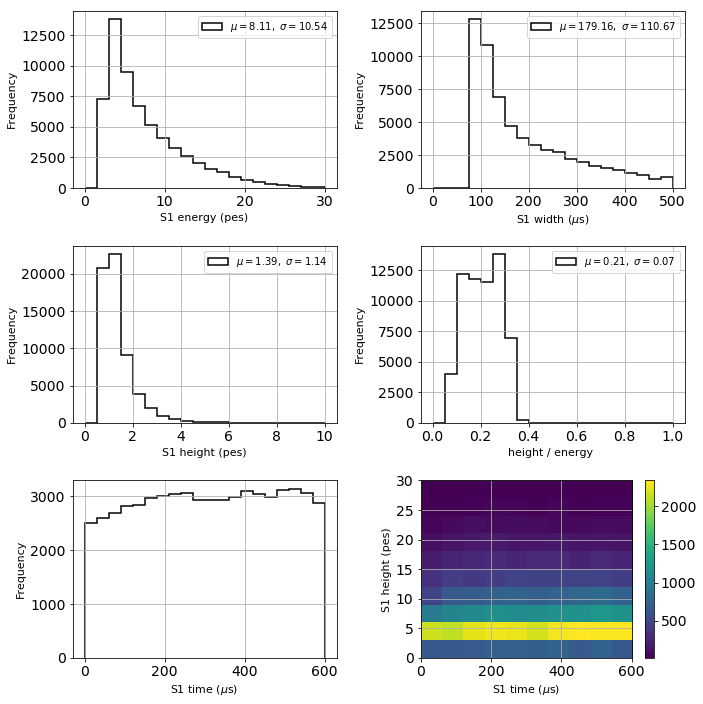

In [486]:
krf.plot_s1histos(dst5287, figsize=(10,10))

### ns1 = 1

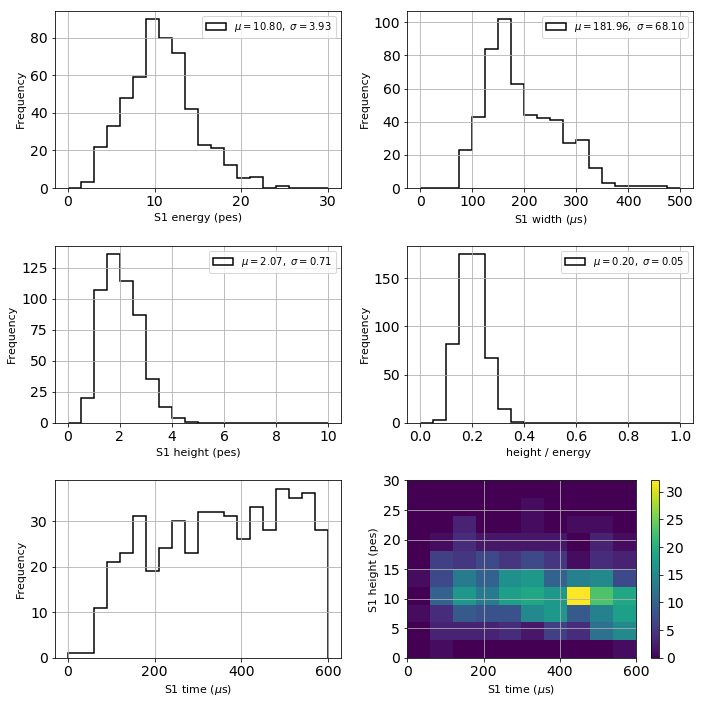

In [487]:
krf.plot_s1histos(dst5287[dst5287.ns1==1], bins=20, figsize=(10,10))

### ns1 = 2

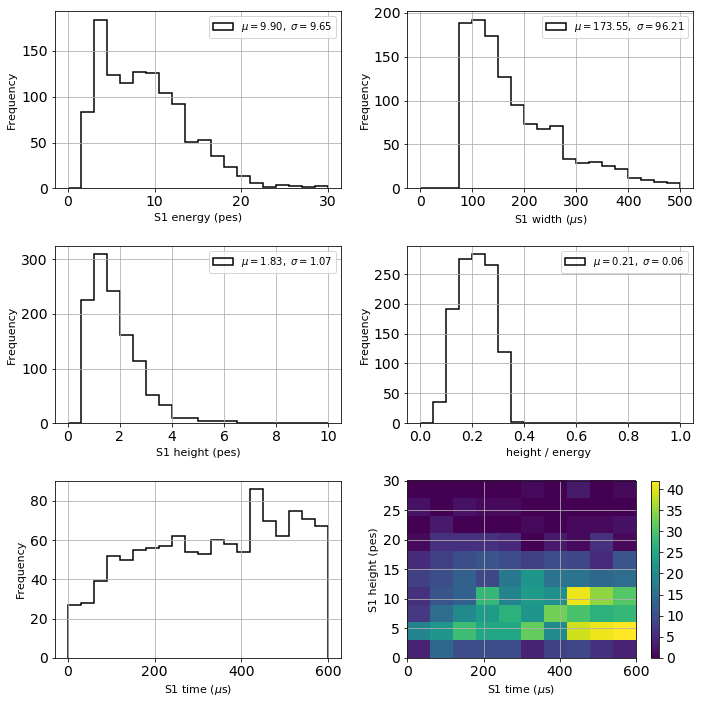

In [475]:
krf.plot_s1histos(dst5287[dst5287.ns1==2], bins=20, figsize=(10,10))

In [484]:
b5287 = dst5287[dst5287.ns1==2]
a5287 = dst5287[dst5287.ns1==1]

In [478]:
b5287g = b5287.groupby(['evt'])

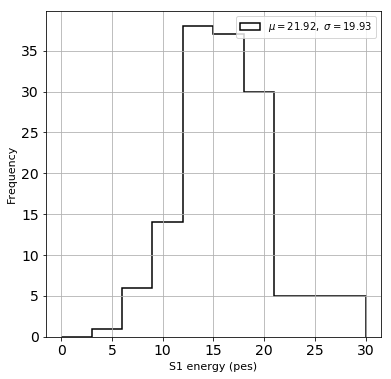

In [482]:
h1d(b5287g.es1.max(), bins=10, range=(0,30), figsize=(6,6), xlabel='S1 energy (pes)')  

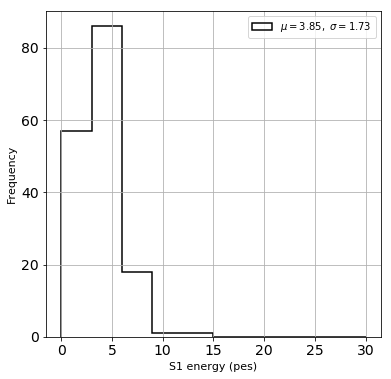

In [483]:
h1d(b5287g.es1.min(), bins=10, range=(0,30), figsize=(6,6), xlabel='S1 energy (pes)')  

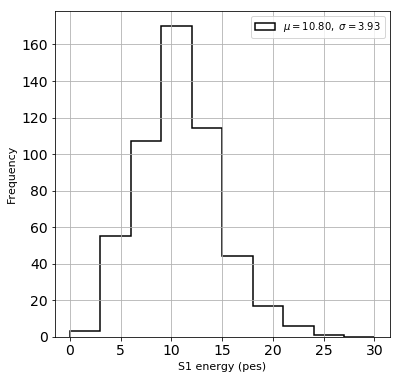

In [485]:
h1d(a5287.es1, bins=10, range=(0,30), figsize=(6,6), xlabel='S1 energy (pes)')  

In [ ]:
b5287['es1'].groupby(b5287['evt']).max()

## C = 7.5 kV low Krypton intensity

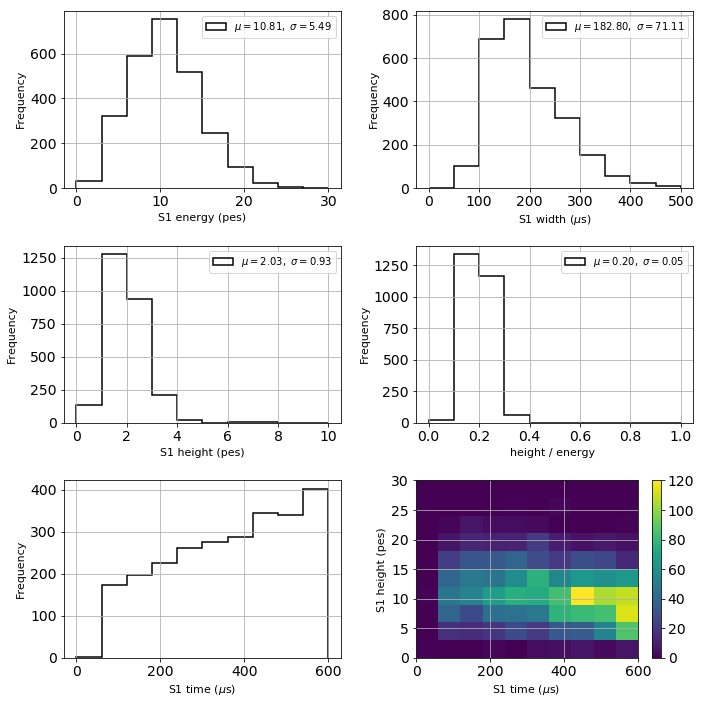

In [419]:
krf.plot_s1histos(dst5298[dst5298.ns1==1], figsize=(10,10))

## C = 7.0 kV high itensity

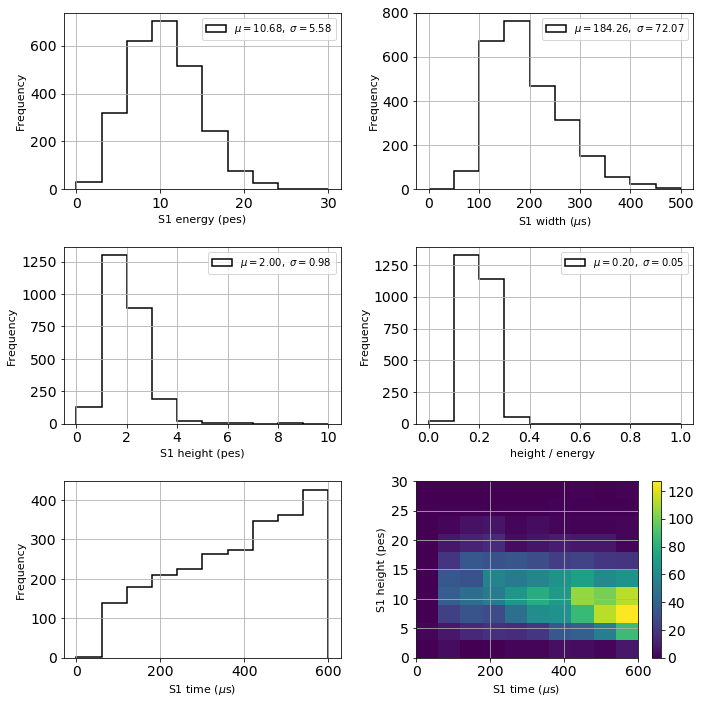

In [420]:
krf.plot_s1histos(dst5295[dst5295.ns1==1], figsize=(10,10))

## What is the second s1?

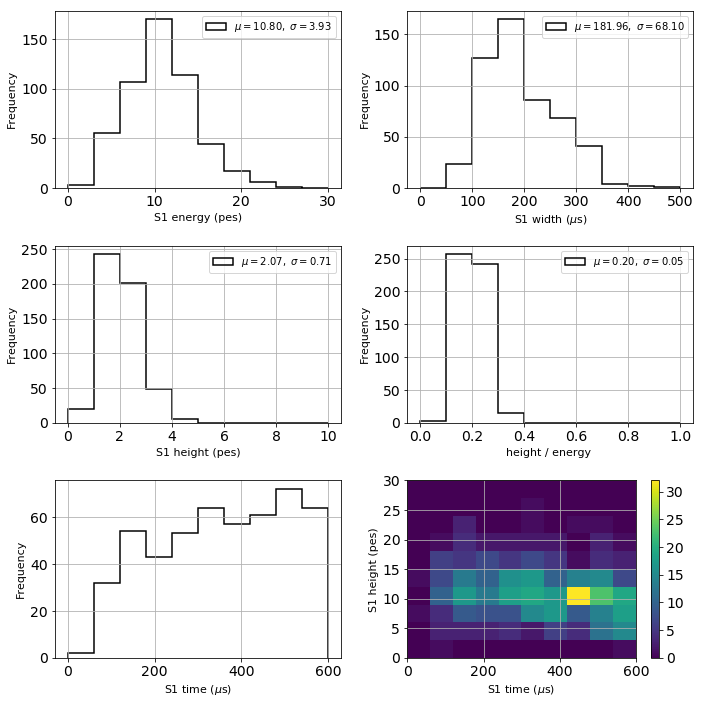

In [421]:
krf.plot_s1histos(dst5287[dst5287.ns1==1], figsize=(10,10))

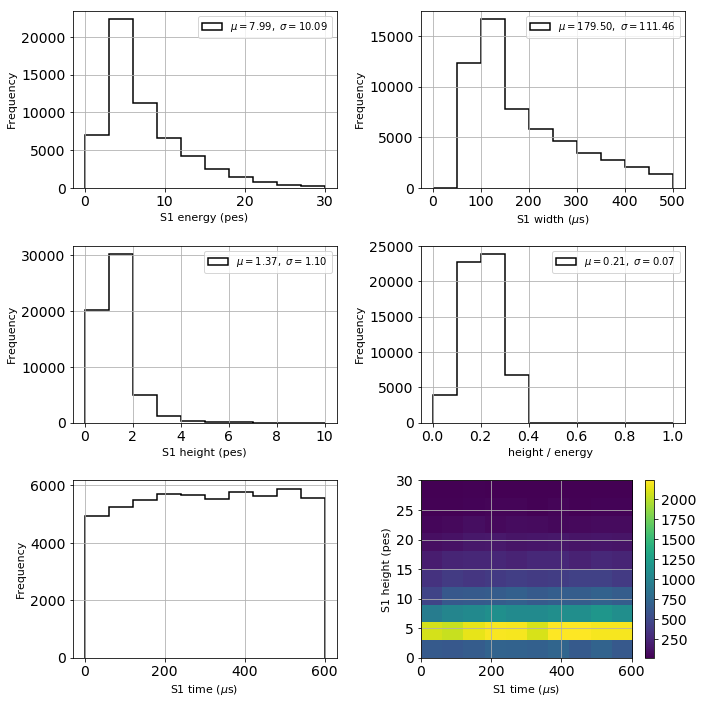

In [427]:
krf.plot_s1histos(dst5287[dst5287.ns1 >3], figsize=(10,10))

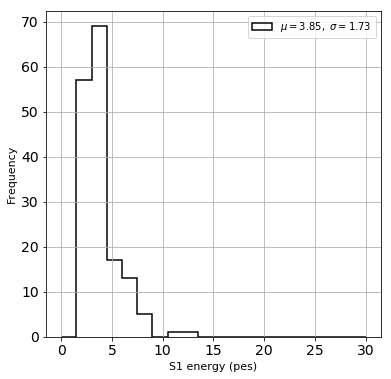

In [467]:
h1d(b5287['es1'].groupby(b5287['evt']).min(), bins=20, range=(0,30), figsize=(6,6), xlabel='S1 energy (pes)') 

In [468]:
b5287['es1'].groupby(b5287['evt']).max()

evt
0.0      14.175363
1.0      15.291579
2.0      15.261273
3.0      50.453059
4.0      39.556512
5.0      19.683440
6.0      12.824849
7.0      22.227239
8.0      14.338649
9.0      15.401866
10.0     16.823034
11.0     19.107322
12.0     61.939490
13.0     15.742848
14.0     12.994328
15.0     22.943261
16.0     30.256567
17.0     14.944893
18.0     16.112657
19.0      5.605632
20.0     16.238705
21.0     12.323406
22.0     25.097224
23.0     10.394922
24.0     18.436296
25.0     19.744849
26.0     29.361797
27.0     19.323188
28.0     18.573295
29.0     12.464493
           ...    
134.0    25.332372
135.0    16.532433
136.0    18.727893
137.0    20.716870
138.0    18.337033
139.0     9.503417
140.0    16.538281
141.0    18.351981
142.0     8.939336
143.0    17.956561
144.0    15.827270
145.0    11.190375
146.0    19.673745
147.0    12.425337
148.0    14.480617
149.0    12.956714
150.0    17.897828
151.0    15.571399
152.0    19.833144
153.0    15.432446
154.0    27.488206
155.0   

In [ ]:
df.groupby("evt_number").max().es1

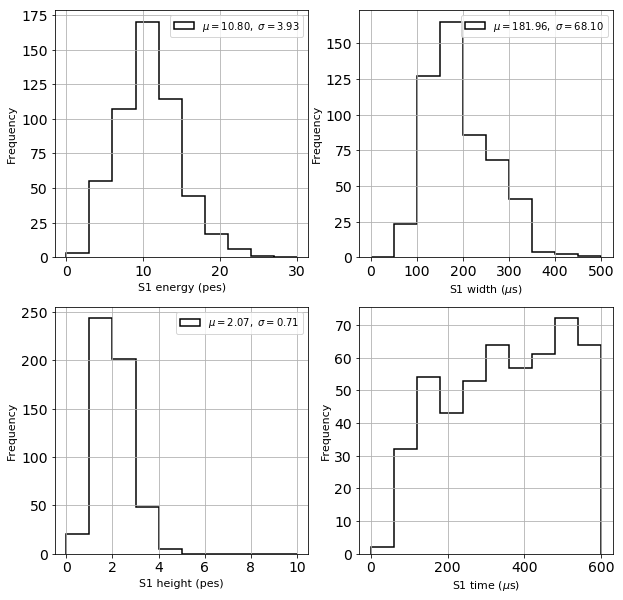

In [406]:
krf.plot_s1histos(dst5287[dst5287.ns1==1], figsize=(10,10))